# **Introducción a Python para Análisis de Datos**
## Capítulo 5: Análisis Exploratorio de Datos (EDA) - Soluciones a Ejercicios
---
Acerca de este notebook
* **Autor:** Juan Martin Bellido
* **Descripción:** *este notebook incluye las soluciones a los ejercicios del capítulo 5*
* **¿Feedback? ¿comentarios?** Por favor compártelo conmigo escribiéndome por [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)


# Capítulo 5: Ejercicios
---


### Ejercicio #1

¿Cómo ha evolucionado la cotización "High" de las acciones desde el 2017?
> Dataset https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv


In [1]:
# importamos librerías
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [2]:
# importamos df
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
df_amzn.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

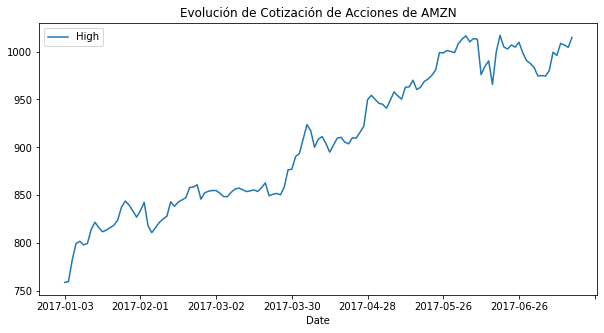

In [3]:
# EX 1
df_amzn[df_amzn["Date"]>'2017-01-01'].plot(
    kind='line'
    ,x='Date' 
    ,y='High'
    ,figsize=(10,5)
    ,title='Evolución de Cotización de Acciones de AMZN'
)

### Ejercicio #2

Analizar la relación entre número de empleados (*Employees*) y facturación (*Revenue*) para las empresas de los sectores: *Energy, Aerospace & Defense y Hotels, Resturants & Leisure*. Visualizar gráfico de dispersión utilizando Seaborn, generando un gráfico por sector.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv



In [4]:
# importamos librerías
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [5]:
df_fortune = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv")
df_fortune.dtypes

Rank          int64
Company      object
Sector       object
Industry     object
Location     object
Revenue       int64
Profits       int64
Employees     int64
dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f500e41ba50>],
      dtype=object)

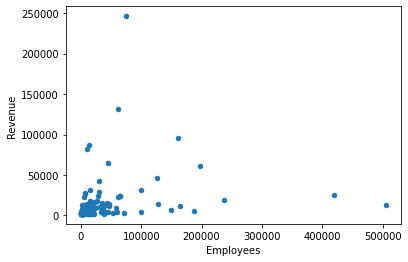

In [6]:
# versión pandas
cond = df_fortune.Sector.isin(['Energy','Aerospace & Defense','Hotels, Resturants & Leisure'])

df_fortune[cond].plot(
    kind = 'scatter',
    x = 'Employees',
    y = 'Revenue',
    subplots = 'Sector'
)


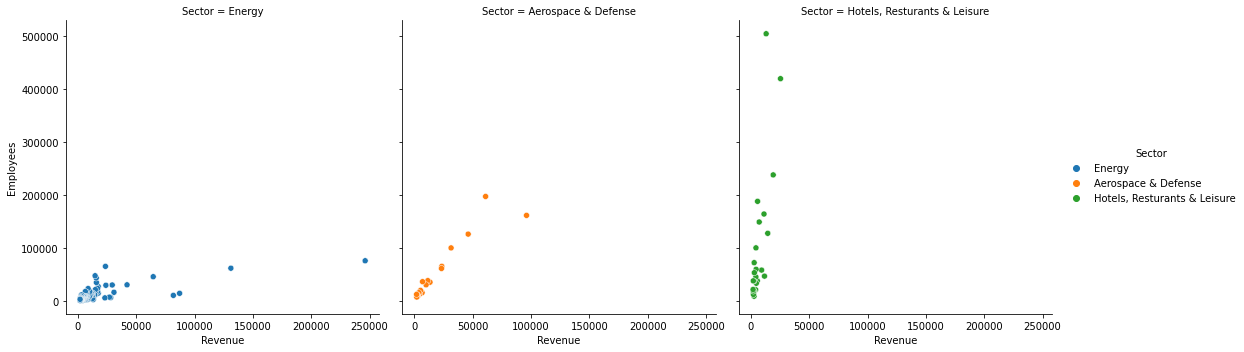

In [7]:
# versión seaborn
cond = df_fortune.Sector.isin(['Energy','Aerospace & Defense','Hotels, Resturants & Leisure'])

sn.relplot(
    x="Revenue",
    y="Employees",
    data=df_fortune[cond],
    hue="Sector",
    col="Sector"
)

### Ejercicio #3

Generar un gráfico de densidad para comparar la distribución de la variable IMDB score para los 5 directores con mayor número de películas.

> 👉 Buscamos visualizar la distribución específica para cada uno de los 5 directores.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv



In [8]:
# importamos librerías
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [9]:
# importamos df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [10]:
# capturamos los 5 directores con más películas
list_directors = df_movies['director_name']\
  .value_counts()\
  .reset_index()\
  .loc[:,'index']\
  .head()

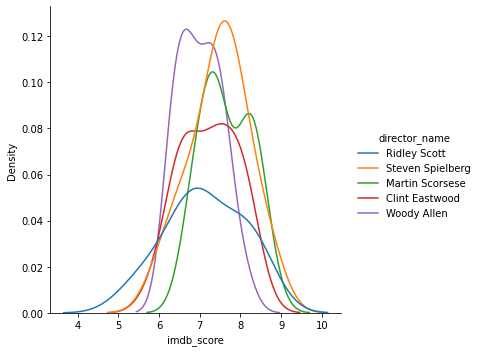

In [11]:
# generamos gráfico de densidad
sn.displot(
    df_movies[df_movies['director_name'].isin(list_directors)],
    kind='kde',
    x='imdb_score',
    hue='director_name'
)

### Ejercicio #4

¿Qué podemos decir acerca de la distribución del PIB per cápita en cada continente? Graficar un boxplot.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv

In [12]:
# importamos librerías
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [13]:
# importamos df
df_who = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv')
df_who.dtypes

Country                                                    object
CountryID                                                   int64
ContinentID                                                 int64
Adolescent fertility rate (%)                             float64
Adult literacy rate (%)                                   float64
Gross national income per capita (PPP international $)    float64
Net primary school enrolment ratio female (%)             float64
Net primary school enrolment ratio male (%)               float64
Population (in thousands) total                           float64
Population annual growth rate (%)                         float64
Population in urban areas (%)                             float64
Population living below the poverty line                  float64
Continent                                                  object
dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


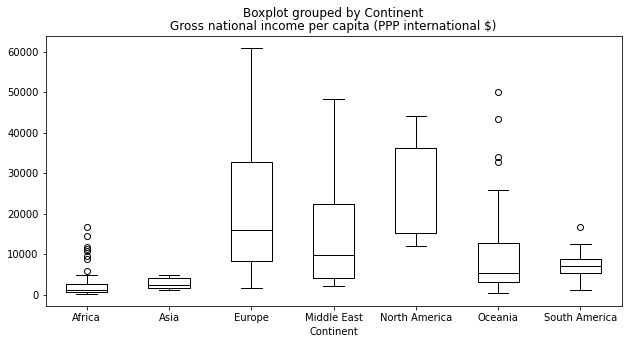

In [14]:
# graficamos
df_who.boxplot(
    by ='Continent'
    ,column ='Gross national income per capita (PPP international $)'
    ,grid = False
    ,color = 'black'
    ,figsize=(10,5)
)

### Ejercicio #5

##### EX 5.A: ¿Cuántos directores hay incluidos en el dataset?
##### EX 5.B: Extraer top 10 variables, según correlación con variable *IMDB score*

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv



In [15]:
# importamos librerías
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [16]:
# Importamos df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [17]:
# EX 5.A
df_movies["director_name"].describe()

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

In [18]:
# EX 5.B
# creamos una matrix de correlación
df = df_movies.corr()['imdb_score'].reset_index()

In [19]:
# convertimos coeficiente de correlación a valor absoluto
df['r_imdb_score_abs'] = df['imdb_score'].abs()

In [20]:
# operamos el dataframe para conseguir el resultado final
df.sort_values('r_imdb_score_abs',ascending=False)\
    .iloc[1:11,:]\
    .rename(columns={'index':'numeric_field'})\
    .loc[:,['numeric_field','imdb_score']]

,numeric_field,imdb_score
6,num_voted_users,0.412427
0,num_critic_for_reviews,0.309733
9,num_user_for_reviews,0.295779
1,duration,0.264440
15,movie_facebook_likes,0.252496
11,title_year,-0.205205
5,gross,0.199914
2,director_facebook_likes,0.173969
7,cast_total_facebook_likes,0.086830
12,actor_2_facebook_likes,0.083761
